<a href="https://colab.research.google.com/github/Arkajeet7/compressor-data-analysis/blob/main/real%20time%20data%20analysis/compressor_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
pip install sdv

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [100]:
from google.colab import files
uploaded = files.upload()

Saving data for notebook compressors.xlsx to data for notebook compressors (3).xlsx


In [101]:
data=pd.read_excel('data for notebook compressors.xlsx')
data.head()

,compresor type,shift A running time,shift B running time,shift C running time,flow shift A,flow shift B,flow shift c,energy shift A,energy shift B,energy shift C
0,centac,0,0,0,0.000,0.0,0.0,0.0,0.0,0.0
1,screw1,2,0,0,0.108,0.0,0.0,319.7,0.0,0.0
2,screw2,1,0,0,0.092,0.0,0.0,0.0,0.0,0.0
3,screw3,0,0,0,0.000,0.0,0.0,0.0,0.0,0.0
4,centac,0,0,0,0.000,0.0,0.0,0.0,0.0,0.0


In [102]:
count_df=data.iloc[:,3].value_counts().sort_index()
count_df1=data.iloc[:,2].value_counts().sort_index()
count_df2=data.iloc[:,1].value_counts().sort_index()

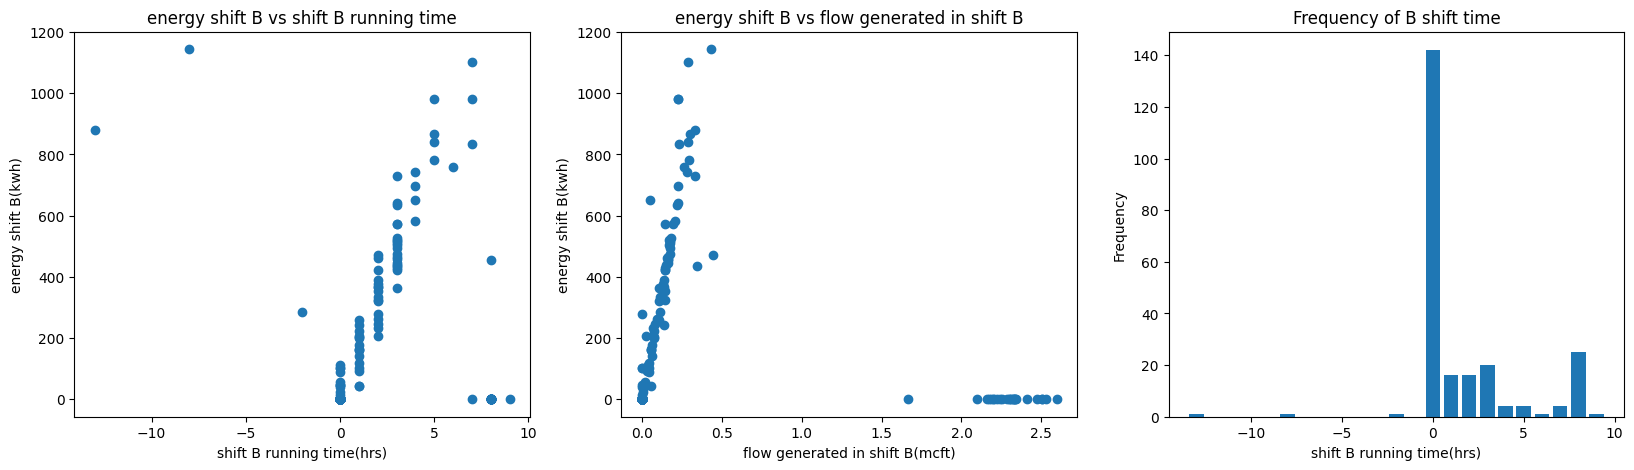

In [103]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.scatter(data.iloc[:,2],data.iloc[:,-2],)
ax1.set_xlabel('shift B running time(hrs)')
ax1.set_ylabel('energy shift B(kwh)')
ax1.set_title('energy shift B vs shift B running time')

ax2.scatter(data.iloc[:,5],data.iloc[:,-2],)
ax2.set_xlabel('flow generated in shift B(mcft)')
ax2.set_ylabel('energy shift B(kwh)')
ax2.set_title('energy shift B vs flow generated in shift B')

ax3.bar(count_df1.index,count_df1.values)
ax3.set_xlabel('shift B running time(hrs)')
ax3.set_ylabel('Frequency')
ax3.set_title('Frequency of B shift time')

plt.show()

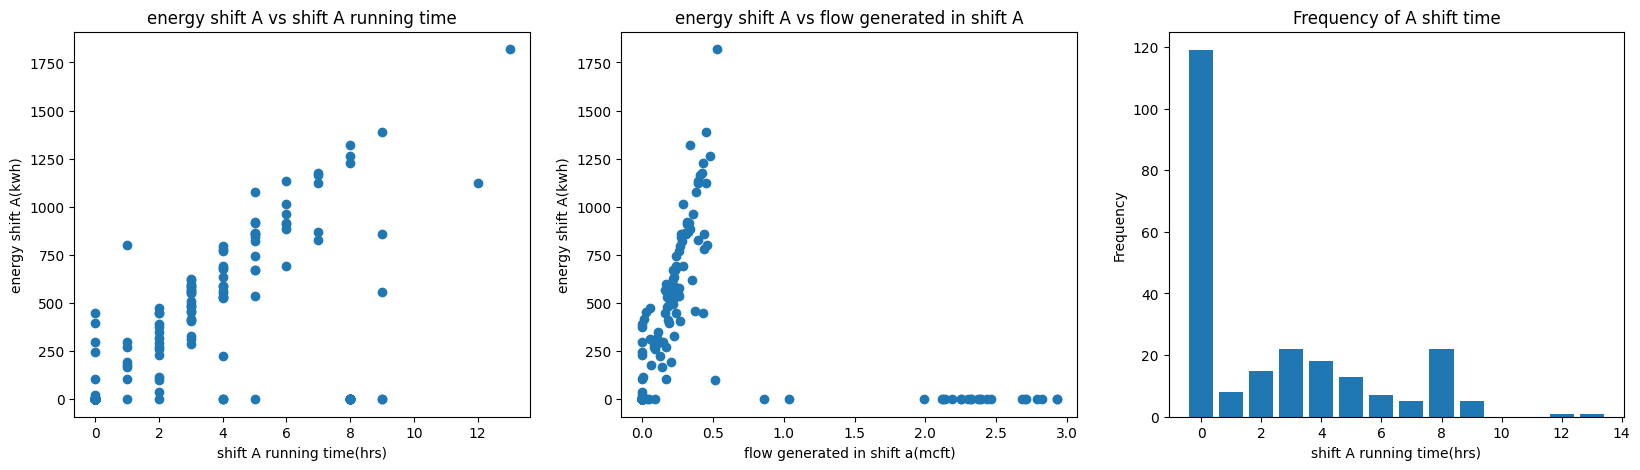

In [104]:
fig2,(bx1,bx2,bx3)=plt.subplots(1,3,figsize=(20,5))

bx1.scatter(data.iloc[:,1],data.iloc[:,-3])
bx1.set_xlabel('shift A running time(hrs)')
bx1.set_ylabel('energy shift A(kwh)')
bx1.set_title('energy shift A vs shift A running time')

bx2.scatter(data.iloc[:,4],data.iloc[:,-3])
bx2.set_xlabel('flow generated in shift a(mcft)')
bx2.set_ylabel('energy shift A(kwh)')
bx2.set_title('energy shift A vs flow generated in shift A')

bx3.bar(count_df2.index,count_df2.values)
bx3.set_xlabel('shift A running time(hrs)')
bx3.set_ylabel('Frequency')
bx3.set_title('Frequency of A shift time')

plt.show()

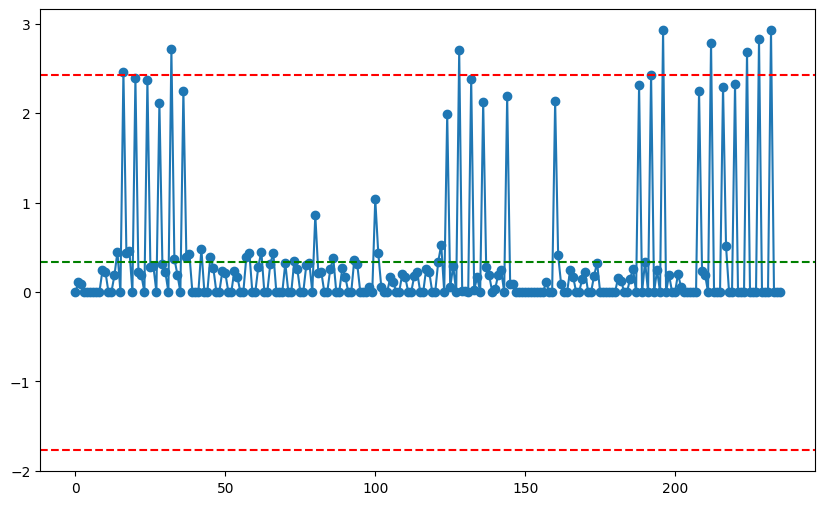

In [105]:
mean2=data.iloc[:,4].mean()
std2=data.iloc[:,4].std()
ucl2=mean2+3*std2
lcl2=mean2-3*std2

plt.figure(figsize=(10, 6))
plt.plot(data.index,data.iloc[:,4], marker='o', label='flow shift A')
plt.axhline(mean2, color='green', linestyle='--', label='Mean')
plt.axhline(ucl2, color='red', linestyle='--', label='UCL')
plt.axhline(lcl2, color='red', linestyle='--', label='LCL')
plt.show()

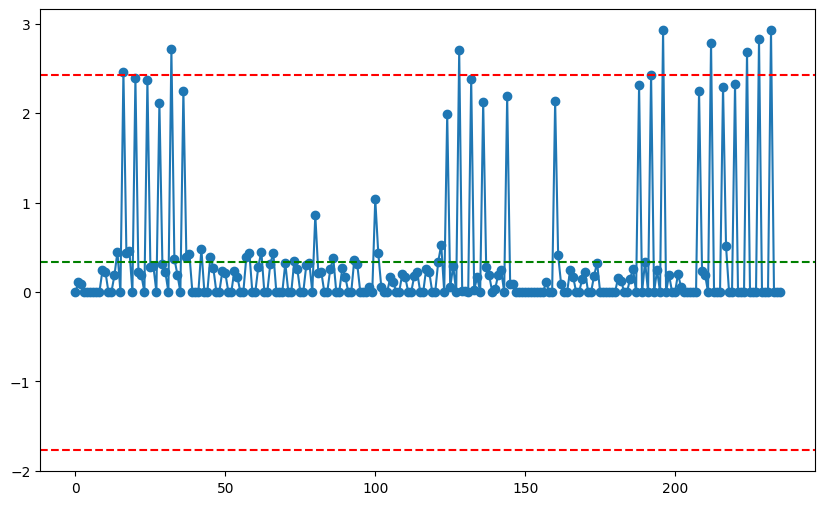

In [106]:
mean1=data.iloc[:,4].mean()
std1=data.iloc[:,4].std()
ucl1=mean1+3*std1
lcl1=mean1-3*std1

plt.figure(figsize=(10, 6))
plt.plot(data.index,data.iloc[:,4], marker='o', label='flow shift A')
plt.axhline(mean1, color='green', linestyle='--', label='Mean')
plt.axhline(ucl1, color='red', linestyle='--', label='UCL')
plt.axhline(lcl1, color='red', linestyle='--', label='LCL')
plt.show()

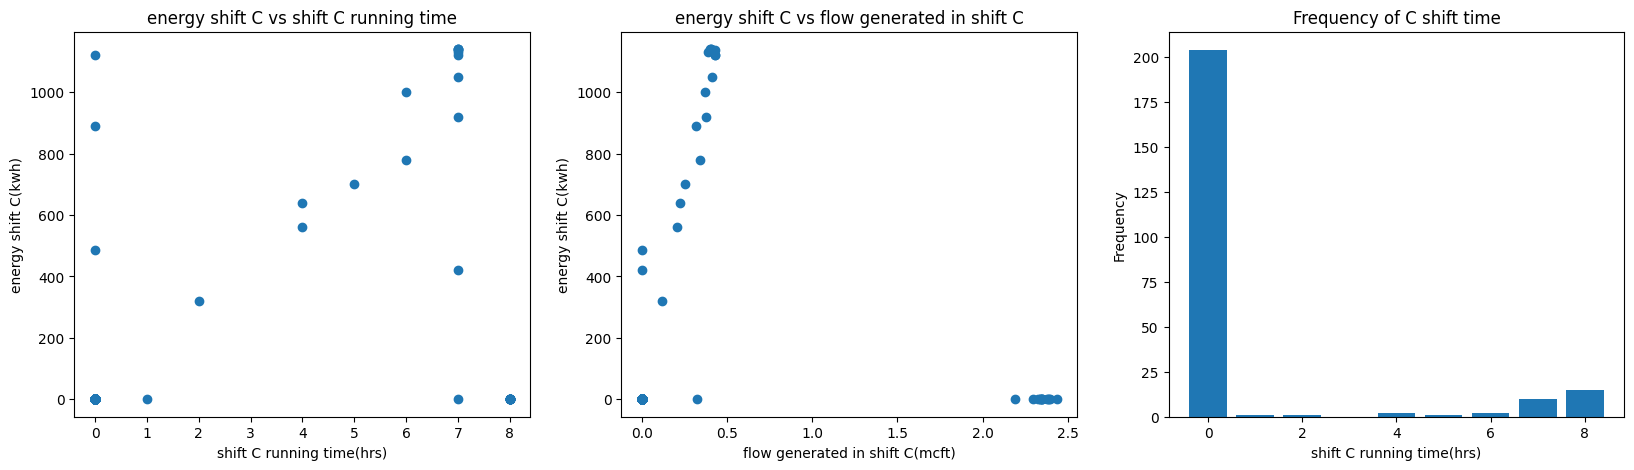

In [107]:
fig3,(cx1,cx2,cx3)=plt.subplots(1,3,figsize=(20,5))

cx1.scatter(data.iloc[:,3],data.iloc[:,-1])
cx1.set_xlabel('shift C running time(hrs)')
cx1.set_ylabel('energy shift C(kwh)')
cx1.set_title('energy shift C vs shift C running time')

cx2.scatter(data.iloc[:,6],data.iloc[:,-1])
cx2.set_xlabel('flow generated in shift C(mcft)')
cx2.set_ylabel('energy shift C(kwh)')
cx2.set_title('energy shift C vs flow generated in shift C')

cx3.bar(count_df.index,count_df.values)
cx3.set_xlabel('shift C running time(hrs)')
cx3.set_ylabel('Frequency')
cx3.set_title('Frequency of C shift time')

plt.show()

In [108]:
A_shift_data=data.iloc[:,[0,1,4,7]].copy()
A_shift_data.head()

,compresor type,shift A running time,flow shift A,energy shift A
0,centac,0,0.000,0.0
1,screw1,2,0.108,319.7
2,screw2,1,0.092,0.0
3,screw3,0,0.000,0.0
4,centac,0,0.000,0.0


In [109]:
A_shift_data.drop(A_shift_data[A_shift_data['shift A running time']==0].index,inplace=True)
A_shift_data.shape

(117, 4)

In [110]:
A_shift_data.drop(A_shift_data[A_shift_data['flow shift A']>0.5].index,inplace=True)
A_shift_data.shape

(91, 4)

In [111]:
1500-91

1409

In [112]:
B_shift_data=data.iloc[:,[0,2,5,8]].copy()
C_shift_data=data.iloc[:,[0,3,6,9]].copy()

In [113]:
B_shift_data.drop(B_shift_data[B_shift_data['shift B running time']==0].index,inplace=True)
C_shift_data.drop(C_shift_data[C_shift_data['shift C running time']==0].index,inplace=True)
B_shift_data.head()

,compresor type,shift B running time,flow shift B,energy shift B
5,screw1,-2,0.110,286.1
9,screw1,2,0.143,323.8
14,screw2,6,0.265,760.5
16,centac,8,2.338,0.0
17,screw1,3,0.328,731.2


In [114]:
B_shift_data.drop(B_shift_data[B_shift_data['flow shift B']>1.5].index,inplace=True)
B_shift_data.drop(B_shift_data[B_shift_data['shift B running time']<0].index,inplace=True)
A_shift_data.shape

(91, 4)

In [115]:
1500-96

1404

In [116]:
from sdv.single_table import TVAESynthesizer
from sdv.metadata import SingleTableMetadata

def dataaugment1(df,i):
  metadata = SingleTableMetadata()
  metadata.detect_from_dataframe(data=df)

  model3 = TVAESynthesizer(metadata)
  model3.fit(df)

  df_synthetic_tvae = model3.sample(num_rows=i)
  clubbed_data=pd.concat([df,df_synthetic_tvae], ignore_index=True)
  clubbed_data.reset_index(drop=True,inplace=True)

  return clubbed_data

In [117]:
A_shift_augmented=dataaugment1(A_shift_data,1409)
A_shift_augmented.head()

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:163: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:129: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,compresor type,shift A running time,flow shift A,energy shift A
0,screw1,2,0.108,319.7
1,screw2,1,0.092,0.0
2,screw1,2,0.000,38.9
3,screw1,6,0.240,690.2
4,screw2,4,0.225,585.9


In [118]:
A_shift_augmented.describe()

,shift A running time,flow shift A,energy shift A
count,1500.000000,1500.000000,1500.000000
mean,3.573333,0.223663,594.443133
std,1.534338,0.095724,242.880435
min,1.000000,0.000000,0.000000
25%,3.000000,0.160000,437.100000
50%,3.000000,0.224500,588.550000
75%,4.000000,0.290000,750.200000
max,12.000000,0.481000,1386.100000


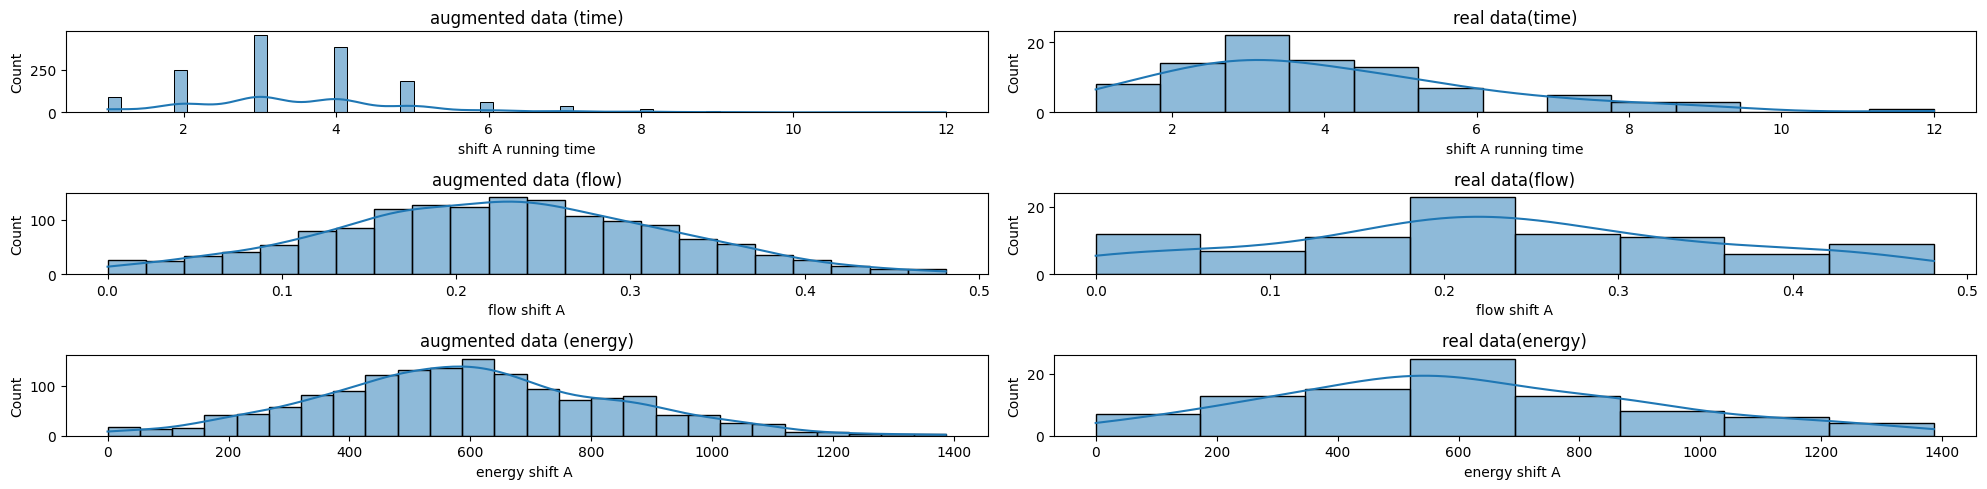

In [119]:
fig1,axes2=plt.subplots(3,2,figsize=(20,5))

axes2 = axes2.flatten()

sns.histplot(A_shift_augmented.iloc[:,1], kde=True, ax=axes2[0])
axes2[0].set_title('augmented data (time)')
sns.histplot(A_shift_data.iloc[:,1], kde=True, ax=axes2[1])
axes2[1].set_title('real data(time)')

sns.histplot(A_shift_augmented.iloc[:,2], kde=True, ax=axes2[2])
axes2[2].set_title('augmented data (flow)')
sns.histplot(A_shift_data.iloc[:,2], kde=True, ax=axes2[3])
axes2[3].set_title('real data(flow)')

sns.histplot(A_shift_augmented.iloc[:,3], kde=True, ax=axes2[4])
axes2[4].set_title('augmented data (energy)')
sns.histplot(A_shift_data.iloc[:,3], kde=True, ax=axes2[5])
axes2[5].set_title('real data(energy)')

plt.tight_layout()
plt.show()

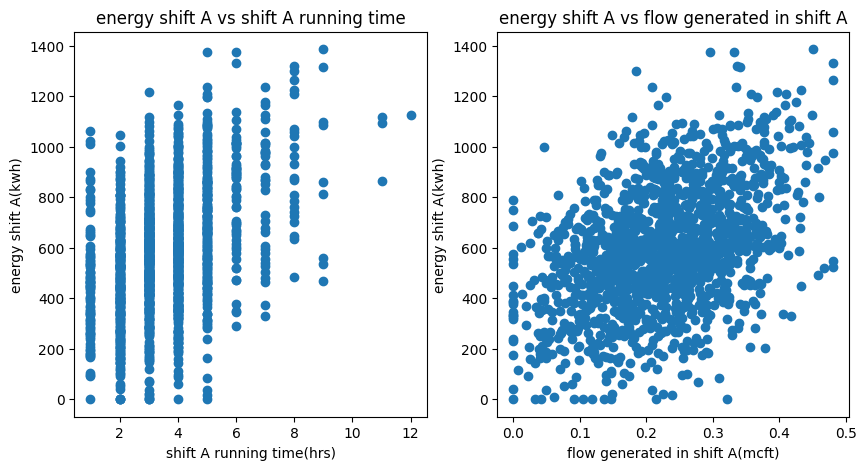

In [120]:
fig6,(fx1,fx2,)=plt.subplots(1,2,figsize=(10,5))

fx1.scatter(A_shift_augmented.iloc[:,1],A_shift_augmented.iloc[:,3])
fx1.set_xlabel('shift A running time(hrs)')
fx1.set_ylabel('energy shift A(kwh)')
fx1.set_title('energy shift A vs shift A running time')

fx2.scatter(A_shift_augmented.iloc[:,2],A_shift_augmented.iloc[:,3])
fx2.set_xlabel('flow generated in shift A(mcft)')
fx2.set_ylabel('energy shift A(kwh)')
fx2.set_title('energy shift A vs flow generated in shift A')

plt.show()

In [121]:
count_df4=A_shift_augmented.iloc[:,1].value_counts().sort_index()
A_shift_augmented['compresor type'].unique()

array(['screw1', 'screw2', 'centac'], dtype=object)

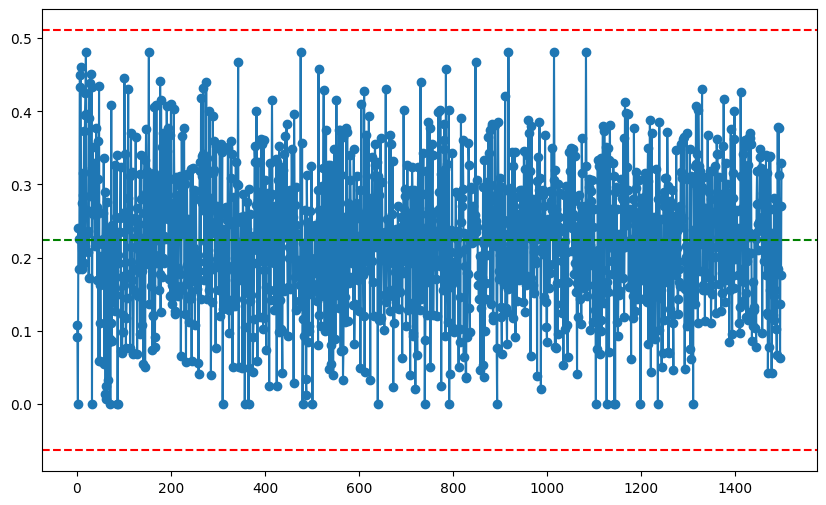

In [122]:
mean = A_shift_augmented.iloc[:,2].mean()
std = A_shift_augmented.iloc[:,2].std()
ucl = mean + 3 * std
lcl = mean - 3 * std

plt.figure(figsize=(10, 6))
plt.plot(A_shift_augmented.index, A_shift_augmented.iloc[:,2], marker='o', label='Efficiency')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl, color='red', linestyle='--', label='UCL')
plt.axhline(lcl, color='red', linestyle='--', label='LCL')
plt.show()

DATA PREPROCESSING:

In [123]:
print(A_shift_augmented.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['compresor type', 'shift A running time', 'flow shift A',
       'energy shift A '],
      dtype='object')>


In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_features=['shift A running time','flow shift A','energy shift A ']
categorical_features=['compresor type']

numeric_pipeline = Pipeline([
    ('power', PowerTransformer(method='yeo-johnson', standardize=False)),
    ('scaler', StandardScaler())
])
column_transform = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore',drop='first'),categorical_features),
    ('num', numeric_pipeline, numeric_features)],remainder='passthrough')

In [125]:
print(numeric_features)

['shift A running time', 'flow shift A', 'energy shift A ']


In [126]:
arr_data=column_transform.fit_transform(A_shift_augmented)

# Get encoded feature names for categorical columns
ohe_feature_names = column_transform.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine numeric + encoded categorical names
all_feature_names = list(ohe_feature_names)+numeric_features

processed_data = pd.DataFrame(arr_data,columns=all_feature_names)
processed_data.head()

,compresor type_screw1,compresor type_screw2,shift A running time,flow shift A,energy shift A
0,1.0,0.0,-1.094954,-1.209890,-1.128348
1,0.0,1.0,-2.183349,-1.378345,-2.840872
2,1.0,0.0,-1.094954,-2.350496,-2.551186
3,1.0,0.0,1.478854,0.173431,0.420449
4,0.0,1.0,0.405331,0.016790,0.002852


In [127]:
processed_data.describe()

,compresor type_screw1,compresor type_screw2,shift A running time,flow shift A,energy shift A
count,1500.00000,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03
mean,0.56600,0.433333,-4.855375e-17,-1.042129e-16,-1.373716e-16
std,0.49579,0.495701,1.000334e+00,1.000334e+00,1.000334e+00
min,0.00000,0.000000,-2.183349e+00,-2.350496e+00,-2.840872e+00
25%,0.00000,0.000000,-2.685503e-01,-6.636045e-01,-6.154625e-01
50%,1.00000,0.000000,-2.685503e-01,1.156621e-02,1.360669e-02
75%,1.00000,1.000000,4.053308e-01,6.945933e-01,6.558593e-01
max,1.00000,1.000000,3.648747e+00,2.672567e+00,2.999547e+00


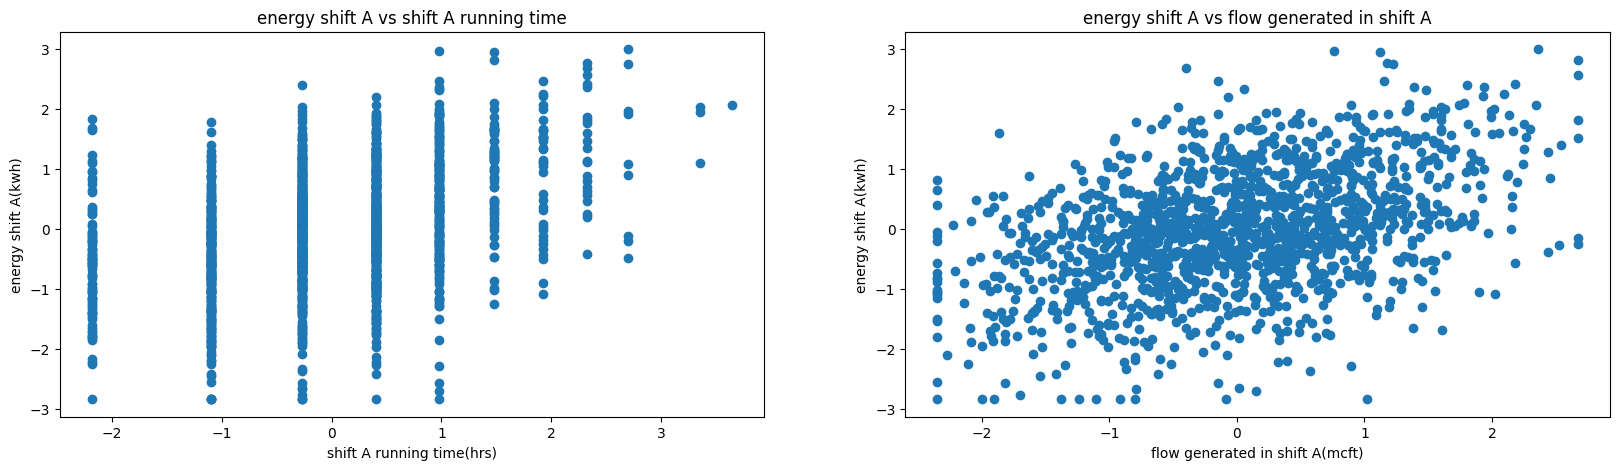

In [128]:
fig5,(dx1,dx2)=plt.subplots(1,2,figsize=(20,5))

dx1.scatter(processed_data.iloc[:,2],processed_data.iloc[:,4])
dx1.set_xlabel('shift A running time(hrs)')
dx1.set_ylabel('energy shift A(kwh)')
dx1.set_title('energy shift A vs shift A running time')

dx2.scatter(processed_data.iloc[:,3],processed_data.iloc[:,4])
dx2.set_xlabel('flow generated in shift A(mcft)')
dx2.set_ylabel('energy shift A(kwh)')
dx2.set_title('energy shift A vs flow generated in shift A')

plt.show()

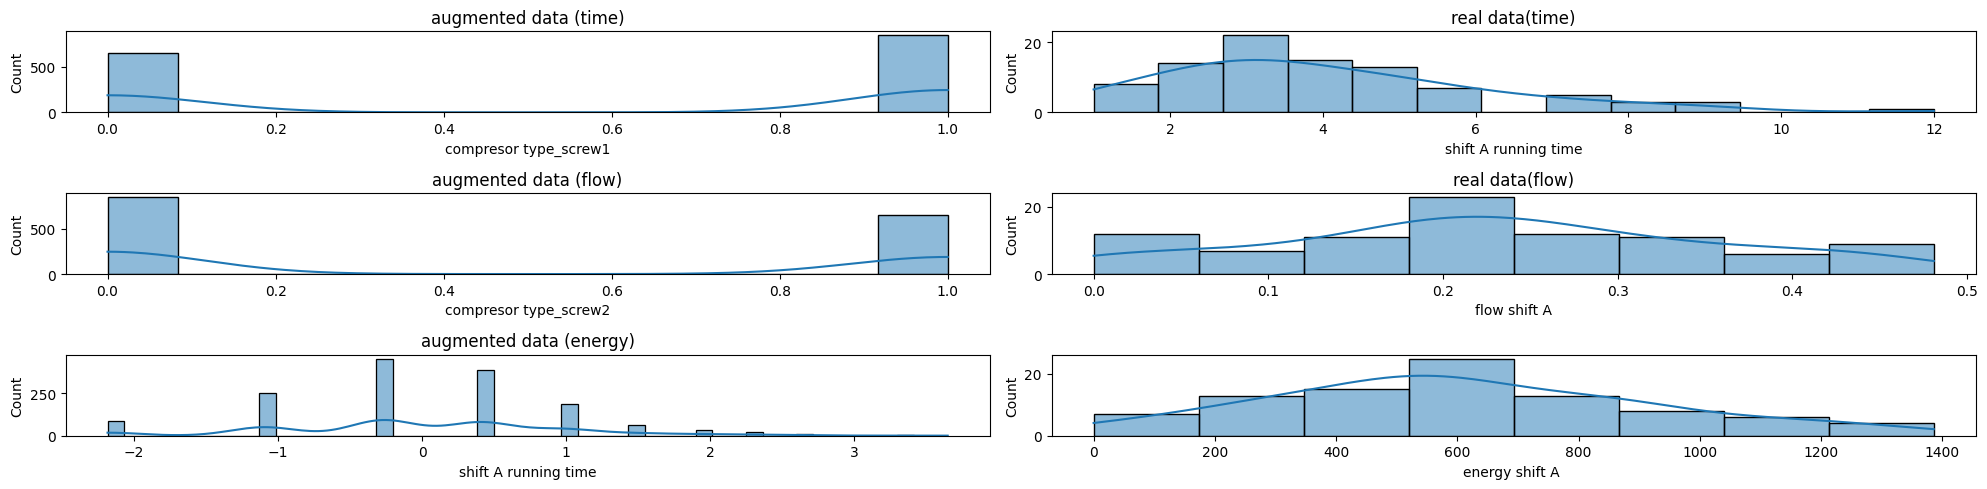

In [129]:
fig4,axes3=plt.subplots(3,2,figsize=(20,5))

axes3 = axes3.flatten()

sns.histplot(processed_data.iloc[:,0], kde=True, ax=axes3[0])
axes3[0].set_title('augmented data (time)')
sns.histplot(A_shift_data.iloc[:,1], kde=True, ax=axes3[1])
axes3[1].set_title('real data(time)')

sns.histplot(processed_data.iloc[:,1], kde=True, ax=axes3[2])
axes3[2].set_title('augmented data (flow)')
sns.histplot(A_shift_data.iloc[:,2], kde=True, ax=axes3[3])
axes3[3].set_title('real data(flow)')

sns.histplot(processed_data.iloc[:,2], kde=True, ax=axes3[4])
axes3[4].set_title('augmented data (energy)')
sns.histplot(A_shift_data.iloc[:,3], kde=True, ax=axes3[5])
axes2[5].set_title('real data(energy)')

plt.tight_layout()
plt.show()

In [130]:
x_train,X_test,y_train,y_test=train_test_split(processed_data.iloc[:,[0,1,2,3]],processed_data.iloc[:,4],test_size=0.2,random_state=42)

MODEL ARCHETITECTURE:

In [131]:
model = Sequential([
    Dense(128, input_dim=4, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)  # Linear output for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
history1 = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 1.0822 - mae: 0.7661 - val_loss: 0.8066 - val_mae: 0.6548
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8976 - mae: 0.7051 - val_loss: 0.7988 - val_mae: 0.6564
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8309 - mae: 0.6662 - val_loss: 0.7783 - val_mae: 0.6565
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8607 - mae: 0.6961 - val_loss: 0.7629 - val_mae: 0.6549
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8555 - mae: 0.6992 - val_loss: 0.7675 - val_mae: 0.6524
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8175 - mae: 0.6771 - val_loss: 0.7633 - val_mae: 0.6506
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9087 - mae: 0.7169 - val_loss: 0.7555 - val_mae: 0.6552
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.8510 - mae: 0.7001 - val_loss: 0.7511 - val_mae: 0.6516
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8

In [134]:
from sklearn.metrics import r2_score
score=r2_score(y_test,model.predict(X_test))
print(score)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.17128368172036368


In [135]:
# --- Categorical one-hot: Assume 2 categories each with 2 options (adjust if needed)
def random_one_hot(n_samples, n_categories):
    indices = np.random.choice(n_categories, n_samples)
    one_hot = np.eye(n_categories)[indices]
    return one_hot

# Example: 2 one-hot encoded features
cat1 = random_one_hot(n_samples=100, n_categories=2)  # e.g., [1, 0] or [0, 1]
  # another feature

# --- Scaled numeric features: generate values between 0 and 1
num1 = np.random.uniform(0, 1, 100).reshape(-1, 1)  # already scaled
num2 = np.random.uniform(0, 1, 100).reshape(-1, 1)  # already scaled

# --- Concatenate everything together
X_random = np.hstack([num1,num2,cat1])
plotting_data=pd.DataFrame(X_random,columns=x_train.columns.to_list())
plotting_data.head()

,compresor type_screw1,compresor type_screw2,shift A running time,flow shift A
0,0.112422,0.332826,0.0,1.0
1,0.568173,0.939664,1.0,0.0
2,0.055145,0.205456,1.0,0.0
3,0.244380,0.501376,0.0,1.0
4,0.580592,0.659035,1.0,0.0


In [136]:
y_pred_arr=model.predict(plotting_data)
y_pred=pd.DataFrame(y_pred_arr,columns=['predicted energy'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


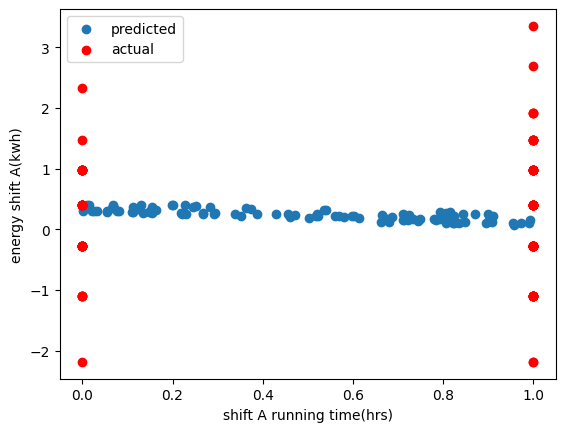

In [137]:
plt.scatter(plotting_data.iloc[:,0],y_pred)
plt.scatter(processed_data.iloc[:,0].sample(100),processed_data.iloc[:,2].sample(100),color='red')
plt.legend(['predicted','actual'])
plt.xlabel('shift A running time(hrs)')
plt.ylabel('energy shift A(kwh)')
plt.savefig("actual_vs_predicted.png")

In [138]:
import xgboost as xgb

model3=xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,random_state=42)
model3.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [139]:
y_pred_arr_xgb=model3.predict(plotting_data)
y_pred_xgb=pd.DataFrame(y_pred_arr_xgb,columns=['predicted energy'])

Text(0, 0.5, 'energy shift A(kwh)')

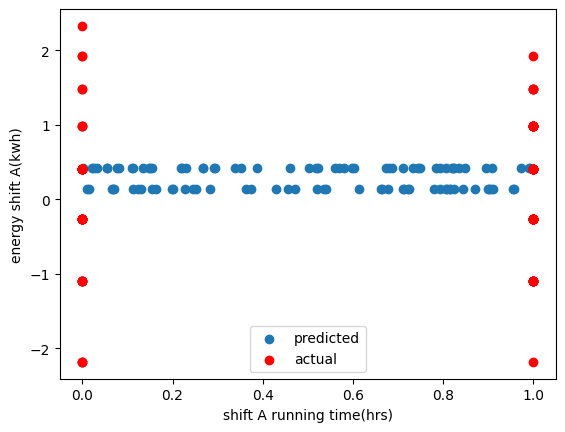

In [140]:
plt.scatter(plotting_data.iloc[:,0],y_pred_xgb)
plt.scatter(processed_data.iloc[:,0].sample(100),processed_data.iloc[:,2].sample(100),color='red')
plt.legend(['predicted','actual'])
plt.xlabel('shift A running time(hrs)')
plt.ylabel('energy shift A(kwh)')

In [141]:
from sklearn.linear_model import LinearRegression

model2=LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [142]:
y_pred_arr_linear=model2.predict(plotting_data)
y_pred_linear=pd.DataFrame(y_pred_arr_linear,columns=['predicted energy'])
y_pred_linear.head()

,predicted energy
0,-0.676021
1,1.248879
2,-1.084024
3,-0.115183
4,0.728840


Text(0, 0.5, 'energy shift A(kwh)')

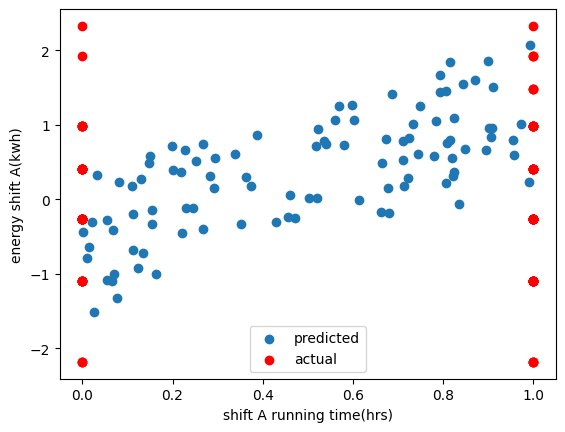

In [143]:
plt.scatter(plotting_data.iloc[:,0],y_pred_linear)
plt.scatter(processed_data.iloc[:,0].sample(100),processed_data.iloc[:,2].sample(100),color='red')
plt.legend(['predicted','actual'])
plt.xlabel('shift A running time(hrs)')
plt.ylabel('energy shift A(kwh)')

** THE MODEL PREDICTED IS NOT UPTO THE MARK . THE REASON OF THIS CAN BE DOWNSIZED TO THESE REASONS:
**

*   THE INPUT VARIABLES DO NOT EXPLAIN THE PROBLEM(XGboost)
*   THE DATA SKEWNESS MIGHT BE A PROBLEM(FOR LINEAR REGRESION AND ANN)

